**1. Найти информационные потери в канале связи, заданном канальной матрицей.**

$$P(\frac{a}{b})\begin{vmatrix}
0& 0 & 1 \\
0 & 1 & 0 \\
1 & 0 & 0
\end{vmatrix}$$

In [10]:
import numpy as np


channel_matrix = np.array([[0, 0, 1],
                            [0, 1, 0],
                            [1, 0, 0]])

Pin = np.array([1/3, 
                1/3, 
                1/3])
# Вероятности выходных символов
Pout = np.dot(channel_matrix, Pin)

# Энтропия входного сообщения
Hin = -np.sum(Pin * np.log2(Pin))

# Энтропия выходного сообщения
Hout = -np.sum(Pout * np.log2(Pout))

# Информационные потери
Iloss = Hin - Hout

print(f"Энтропия входного сообщения: {Hin=:.2f} бит")
print(f"Энтропия выходного сообщения: {Hout=:.2f} бит")
print(f"Информационные потери: {Iloss=:.2f} бит")


Энтропия входного сообщения: Hin=1.58 бит
Энтропия выходного сообщения: Hout=1.58 бит
Информационные потери: Iloss=0.00 бит


**2. Определить информационные потери в канале связи. Заданном
матрицей, если символы алфавита встречаются в сообщениях с равной вероятностью.**

$$P(\frac{a}{b})\begin{vmatrix}
0.99& 0.01 & 0 \\
0.01 & 0.98 & 0 \\
0 & 0.01 & 1
\end{vmatrix}$$

In [11]:
P = np.array([
    [0.99, 0.01, 0],
    [0.01, 0.98, 0],
    [0, 0.01, 1]
])

n = P.shape[0]  # количество символов в алфавите

# Условная энтропию
HYX = 0
for i in range(n):
    for j in range(n):
        if P[i, j] != 0: 
            HYX += (1/n) * P[i, j] * np.log2(1/P[i, j])

# Энтропия источника
HX = np.log2(n)

# Информационные потери в канале связи
L = HX - HYX

print(f"Информационные потери в канале связи {L=:.4f}")


Информационные потери в канале связи L=1.5042


**3. Определить среднее количество информации, содержащееся в
принятом ансамбле сообщений относительно переданного, если сообщения составлены из алфавита А, В, С. Вероятности появления букв алфавита на выходе
источника сообщений Р(Ai) = P(Bi) = 0,25; P(Ci) = 0,5. Условные вероятности пар
вида bi/ai следующие
Р(А/А) = 0,97; Р(А/В) = 0,02; Р(А/С) = 0,01;
Р(В/А) = 0,015; Р(В/В) = 0,97; Р(В/С) = 0,01;
Р(С/А) = 0,015; Р(С/В) = 0,01; Р(С/С) = 0,98.
Проверить правильность результата.**

In [12]:
pX = np.array([0.25, 0.25, 0.5])

# Матрица условных вероятностей P(Y|X)
PYX = np.array([
    [0.97, 0.015, 0.015],
    [0.02, 0.97, 0.01],
    [0.01, 0.01, 0.98]
])

entropy = lambda p: -np.sum(p * np.log2(p + (p == 0)))

def conditional_entropy(pX: np.ndarray, PYX: np.ndarray) -> float:
    HYX = 0
    for i in range(pX.shape[0]):
        for j in range(PYX.shape[1]):
            if PYX[i, j] > 0:
                HYX += pX[i] * PYX[i, j] * np.log2(1/PYX[i, j])
                
    return HYX

def mutual_info(pX: np.ndarray, PYX: np.ndarray) -> float:
    # Энтропию H(Y)
    pY = np.sum(pX[:, np.newaxis] * PYX, axis=0)
    HY = entropy(pY)

    # Вычисляем условную энтропию H(Y|X)
    HYX = conditional_entropy(pX, PYX)

    # Возвращаем взаимную информацию
    return HY - HYX

# Проверим на предоставленных данных
mutual_info(pX, PYX)


1.3114037674468908

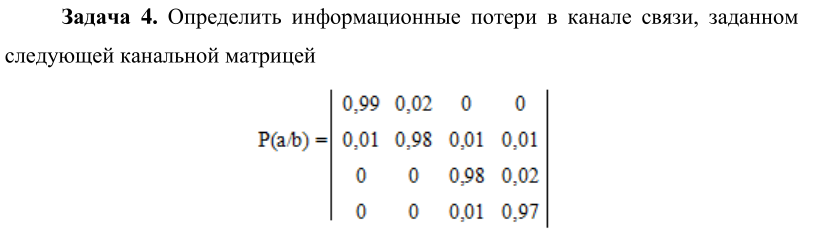
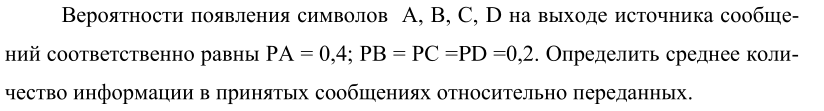

In [13]:
p = [0.4, 0.2, 0.2, 0.2]
probs = [[0.99, 0.02, 0, 0],
         [0.01, 0.98, 0.01, 0.01],
         [0, 0, 0.98, 0.02],
         [0, 0, 0.01, 0.97]]

def f4(p = [], probs=[[]]):
  HY = 0
  
  for i in range(len(probs)):
    for j in range(len(probs[i])):
      HY -= (p[i]) * probs[i][j] * np.log2(probs[i][j] + (probs[i][j] == 0))
      
  HX = 0
  for i in p:
    HX -= i*np.log2(i)
    
  return round(HY, 4), round(HX, 4)

f4(p, probs)

(0.1466, 1.9219)

Потери - $\frac{H_Y}{H_X} \approx 0.076$

**5. Используя энтропию объединения, определить количество информации при передаче сообщений, построенных из алфавита 1, 2, 3, если априорные вероятности появления символов первичного алфавита равны между собой, а в результате действия помех 5% символов передаваемых сообщений могут с равной вероятностью перейти в любой другой символ данного алфавита.**

Для нахождения энтропии:

$$H(X) = -\sum_{i=1}^{n} P(x_i) \cdot \log_2(P(x_i))$$

где:
- $H(X)$ - энтропия алфавита X,
- $P(x_i)$ - априорная вероятность появления символа \(x_i\) в алфавите X,
- $n$ - количество символов в алфавите X.

Для данной задачи у нас есть алфавит, состоящий из символов 1, 2 и 3. Мы знаем, что априорные вероятности появления каждого символа равны между собой, что означает, что $P(1) = P(2) = P(3) = \frac{1}{3}$.

Теперь давайте рассмотрим воздействие помех. Символы могут с равной вероятностью перейти в любой другой символ данного алфавита. Вероятность такой ошибки составляет 5% или 0.05. Таким образом, вероятность передачи символа без ошибки (вероятность успеха) равна $1 - 0.05 = 0.95$, а вероятность ошибки (вероятность неуспеха) равна 0.05.

Построим матрицу связи:

$$P = \begin{pmatrix}
  0.95\space0.025\space0.025\\
  0.95\space0.025\space0.025\\
  0.95\space0.025\space0.025\\
\end{pmatrix}$$

Теперь мы можем рассмотреть энтропию объединения символов до и после передачи:

1. Для алфавита до передачи информации (оригинальный алфавит) у нас есть 3 символа с равными вероятностями:

$$H(X) = -\sum_{i=1}^{3} \left(\frac{1}{3}\right) \cdot \log_2\left(\frac{1}{3}\right) \approx 1.585$$

2. Найдем потери по формуле:

$$H(X|Y) = \sum_i^np(i)H(X|Y_i) = \sum_i^np(i)\sum_j^np(x_j|x_i)\log_2p(x_j|x_i) \approx 0.336$$

Получается при передачи сообщений:

$$I = H(X) - H(X|Y) = 1.249\text{ бит}$$

Теряется $\frac{H(X|Y)}{H(X)} = 0.21$

In [14]:
p = [1/3, 1/3, 1/3]
probs = [[0.95, 0.025, 0.025],
         [0.025, 0.95, 0.025],
         [0.025, 0.025, 0.95]]

f4(p, probs)

(0.3364, 1.585)

**6. Определить количество информации в принятом ансамбле сообщений, если заданы условные вероятности перехода одного сигнала в другой и вероятности появления сигналов на выходе источника сообщений Рa = 0,2; Рb = 0,3; Рc = 0,5; Р(а1/а) = Р(b1/b) = P(c1/c) = 0,97; Р(b1/а) = Р(c1/a) = P(a1/b) = Р(c1/b) = Р(a1/c) = P(b1/c) = 0,015**

In [15]:
p = [0.2, 0.3, 0.5]
probs = [[0.97, 0.015, 0.015],
         [0.015, 0.97, 0.015],
         [0.015, 0.015, 0.97]]

lost, all = f4(p, probs)
print(f"Потеряно {lost} бит из {all}")
print(f"Всего в ансамбле {all - lost} бит")

Потеряно 0.2244 бит из 1.4855
Всего в ансамбле 1.2611 бит


**Контрольные вопросы**
1. Если две системы \(X\) и \(Y\) независимы, энтропия их объединения равна сумме их индивидуальных энтропий: $$H(X, Y) = H(X) + H(Y)$$

2. Среднее количество информации в условиях помех можно вычислить с помощью взаимной информации между переданным и принятым сообщением:
$$I(X;Y) = H(X) - H(X|Y)$$
где \(H(X)\) — энтропия исходного сообщения, \(H(X|Y)\) — условная энтропия исходного сообщения при условии знания принятого сообщения.

3. Если одна система функционально зависит от другой, энтропия их объединения равна энтропии той системы, которая имеет большую энтропию:
$$H(X, Y) = \max(H(X), H(Y))$$

4. Взаимная информация между двумя независимыми системами равна нулю:
\[ I(X;Y) = 0 \]

5. Нет, взаимная информация между двумя системами не может быть больше, чем наименьшая из энтропий этих систем. Максимальное значение для \( I(X;Y) \) равно \(\min(H(X), H(Y))\).

6. Информационные потери при передаче от одной системы к другой можно вычислить как разницу между энтропией исходного сообщения и взаимной информацией между исходным и принятым сообщением:
$$Потери = H(X) - I(X;Y)$$

7. Для полного описания канала связи необходимы:
   - Канальная матрица (описывает вероятности переходов между входами и выходами канала).
   - Характеристики шума и помех.
   - Пропускная способность канала.
   - Возможные источники ошибок и их характеристики.

8. Из канальной матрицы можно определить:
   - Вероятности переходов между различными состояниями канала.
   - Вероятность ошибки передачи (если это применимо к заданному каналу).
   - Информацию о структуре и поведении канала связи.